In [2]:
#THIS IS ALL PREMADE STUFF
#API Key not included.
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import citipy
from api_keys import api_key

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)


lng_range = (-180, 180)

In [3]:
#SAME HERE
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
num_of_cities = len(cities)

In [4]:
# Creating base dataframe
# with Cols: City Cloudiness Country Date Humidity Lat Lng Max Temp Wind Speed
df = pd.DataFrame()
df["City"] = ""
df["Country"] = ""
df["Date"] = ""
df["Cloudiness"] = ""
df["Humidity"] = ""
df["Lat"] = ""
df["Lng"] = ""
df["Max Temp"] = ""
df["Wind Speed"] = ""

In [31]:
#Initializing URL stuff up here
base_url = "https://api.openweathermap.org/data/2.5/weather"
params = {
    "q" : "none for now",
    "appid" : api_key
}

#Grabbing all the data
for index in range(len(cities)):
    
    #change the params to match the city
    params["q"] = cities[index]
    
    #call the api
    response = requests.get(base_url, params)
    
    #assign the stuff from the API to the DF
    try:
    #That API keeps rooster blocking me!
        df.loc[index ,"Country"] = response.json()["sys"]["country"]
        df.loc[index ,"Date"] = response.json()["dt"]
        df.loc[index ,"Cloudiness"] = response.json()["clouds"]["all"]
        df.loc[index ,"Humidity"] = response.json()["main"]["humidity"]
        df.loc[index ,"Lat"] = response.json()["coord"]["lat"]
        df.loc[index ,"Lng"] = response.json()["coord"]["lon"]
        #Temperature is Kelvin by default. Convert to F using: F = 9/5(K - 273) + 32
        #Then round it because it's got too many decimals.
        max_temp = response.json()["main"]["temp_max"]
        df.loc[index ,"Max Temp"] = round(((max_temp - 273) * (9.0/5.0)) + 32, 2)
        df.loc[index ,"Wind Speed"] = response.json()["wind"]["speed"]
    except:
    #print(response.json())
    #gives 404, city not found. Pretty sure API just burnt out.
    




{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city 

KeyboardInterrupt: 

In [29]:
#Write to csv
df.to_csv("city_weather_data.csv", index=False)

#### Latitude vs. Temperature Plot

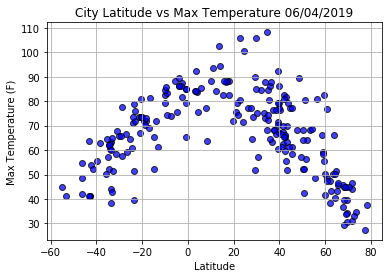

In [43]:
plt.scatter(df['Lat'], df['Max Temp'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.grid()
plt.title("City Latitude vs Max Temperature 06/04/2019")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("MaxTemp.png", dpi=100)

#### Latitude vs. Humidity Plot

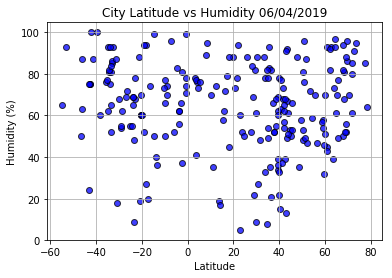

In [44]:
plt.scatter(df['Lat'], df['Humidity'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.grid()
plt.title("City Latitude vs Humidity 06/04/2019")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Humidity.png", dpi=100)

#### Latitude vs. Cloudiness Plot

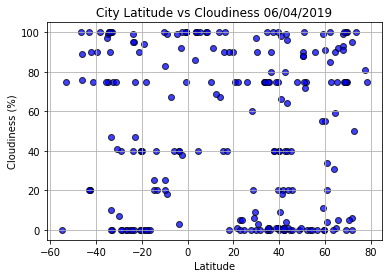

In [45]:
plt.scatter(df['Lat'], df['Cloudiness'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.grid()
plt.title("City Latitude vs Cloudiness 06/04/2019")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Clouds.png", dpi=100)

#### Latitude vs. Wind Speed Plot

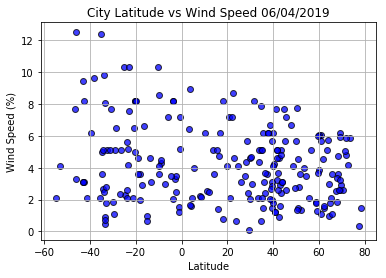

In [46]:
plt.scatter(df['Lat'], df['Wind Speed'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.grid()
plt.title("City Latitude vs Wind Speed 06/04/2019")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.savefig("WindSpeed.png", dpi=100)